In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
Suicide = pd.read_csv('Dataset_Suicidal_Sentiment.csv')
Suicide

,Unnamed: 0,Post,Suicidal_label,Sentiment_label
0,0,Ex Wife Threatening SuicideRecently I left my ...,0,0
1,1,Am I weird I don t get affected by compliments...,1,1
2,2,Finally is almost over So I can never hear ...,1,0
3,3,i need helpjust help me im crying so hard,0,0
4,4,I m so lostHello my name is Adam and I ve b...,0,0
...,...,...,...,...
226948,227680,I sound like a dudebro but I can t handle my f...,0,0
226949,227681,Fuck my sister She is such I fucking bitch and...,1,0
226950,227682,I ve been suicidal for years and no one knowsT...,0,1
226951,227683,My boyfriend is sick so I took some Polaroids ...,1,0


In [4]:
import pandas as pd

# Assuming you have a DataFrame 'df' with the 'label' column
Suicide['Suicidal_label'] = Suicide['Suicidal_label'].map({1: 0, 0: 1})
Suicide

,Unnamed: 0,Post,Suicidal_label,Sentiment_label
0,0,Ex Wife Threatening SuicideRecently I left my ...,1,0
1,1,Am I weird I don t get affected by compliments...,0,1
2,2,Finally is almost over So I can never hear ...,0,0
3,3,i need helpjust help me im crying so hard,1,0
4,4,I m so lostHello my name is Adam and I ve b...,1,0
...,...,...,...,...
226948,227680,I sound like a dudebro but I can t handle my f...,1,0
226949,227681,Fuck my sister She is such I fucking bitch and...,0,0
226950,227682,I ve been suicidal for years and no one knowsT...,1,1
226951,227683,My boyfriend is sick so I took some Polaroids ...,0,0


In [5]:
Suicide = Suicide.drop('Unnamed: 0',axis=1)
Suicide

,Post,Suicidal_label,Sentiment_label
0,Ex Wife Threatening SuicideRecently I left my ...,1,0
1,Am I weird I don t get affected by compliments...,0,1
2,Finally is almost over So I can never hear ...,0,0
3,i need helpjust help me im crying so hard,1,0
4,I m so lostHello my name is Adam and I ve b...,1,0
...,...,...,...
226948,I sound like a dudebro but I can t handle my f...,1,0
226949,Fuck my sister She is such I fucking bitch and...,0,0
226950,I ve been suicidal for years and no one knowsT...,1,1
226951,My boyfriend is sick so I took some Polaroids ...,0,0


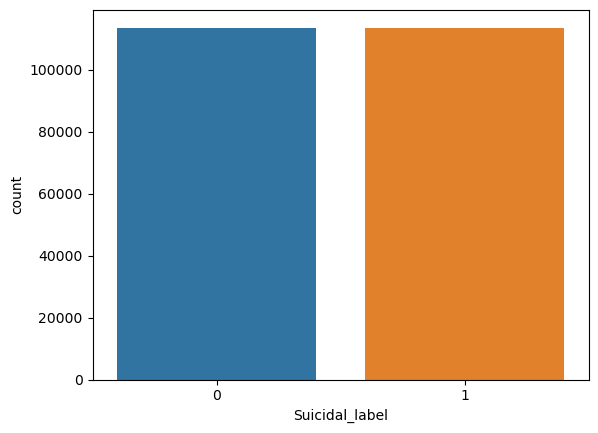

In [6]:
Suicide['Suicidal_label'] = Suicide['Suicidal_label'].astype('category')
sns.countplot(x='Suicidal_label', data=Suicide)
plt.show()

In [7]:
Suicide['Length'] = Suicide['Post'].apply(lambda x: len(str(x).split(' ')))
Suicide['Length'].describe()

count    226953.000000
mean        152.421744
std         253.073394
min           1.000000
25%          29.000000
50%          69.000000
75%         179.000000
max       16427.000000
Name: Length, dtype: float64

In [8]:
len(Suicide['Post'][1])
len(Suicide['Post'][1].split())

29

In [9]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Suicide['Length'].quantile(i))

17.0
25.0
35.0
49.0
69.0
100.0
146.0
221.0
369.0


In [10]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Suicide['Length'].quantile(i))

395.0
423.0
457.0
497.0
547.0
613.0
702.0
840.0
1115.0


In [11]:
#Cutting off the post length at 317 words. 
Suicide = Suicide[Suicide.Length<=317]

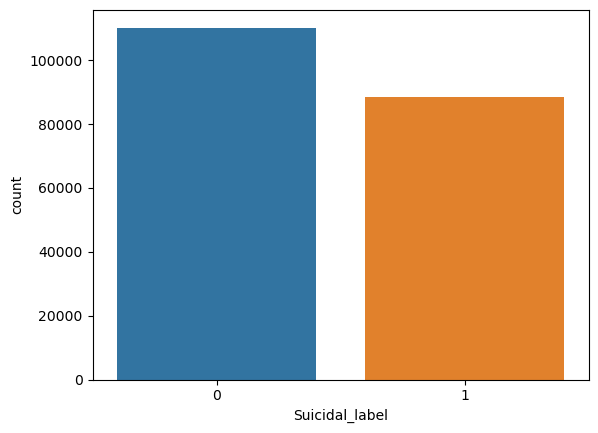

In [12]:
Suicide['Suicidal_label'] = Suicide['Suicidal_label'].astype('category')
sns.countplot(x='Suicidal_label', data=Suicide)
plt.show()

In [13]:
#As we can see we still get a good distribution of the target class.
Words = list()
for i in Suicide['Post']:
    for j in str(i).split(' '):
        Words.append(j.upper())
len(Words)

16896120

In [14]:
from collections import Counter
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq

,Word,Frequency
28,,1606277
4,I,1082859
18,TO,498740
16,AND,412877
89,THE,312340
...,...,...
64875,SUSPIRATIONS,1
64876,UNSUSPECTED,1
64877,SUSURRATION,1
64878,SUSURRATING,1


In [15]:
#Cutting off the words frequency at above 99 quantile and below 31905
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
Words_Freq

,Word,Frequency
28,,1606277
4,I,1082859
18,TO,498740
16,AND,412877
89,THE,312340
...,...,...
6565,CHANNEL,1021
3128,PPL,1020
2272,CONSIDERED,1019
2356,ADULT,1016


In [16]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.head()

,Word,Frequency
166,HAD,31239
168,ONLY,30869
483,WHY,30511
355,THEM,30500
268,WHO,30480


In [17]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] >= 3615.8130000000237]
Words_Freq

,Word,Frequency
166,HAD,31239
168,ONLY,30869
483,WHY,30511
355,THEM,30500
268,WHO,30480
...,...,...
775,BROTHER,3665
1751,PROBLEM,3663
160,TOGETHER,3652
1807,HOSPITAL,3648


In [18]:
Suicide

,Post,Suicidal_label,Sentiment_label,Length
0,Ex Wife Threatening SuicideRecently I left my ...,1,0,154
1,Am I weird I don t get affected by compliments...,0,1,29
2,Finally is almost over So I can never hear ...,0,0,32
3,i need helpjust help me im crying so hard,1,0,9
6,Trigger warning Excuse for self inflicted bur...,1,0,276
...,...,...,...,...
226946,bro i m gonna cry trying so hard not to haha i...,0,0,41
226949,Fuck my sister She is such I fucking bitch and...,0,0,16
226950,I ve been suicidal for years and no one knowsT...,1,1,150
226951,My boyfriend is sick so I took some Polaroids ...,0,0,114


In [19]:
#We get a good list of words. However we might have to reduce this list further based on capacity. 
#We will create separate variables for each of these words based on their presence in the posts. 
Final_Words = list(Words_Freq.Word)
for i in Final_Words:
    Suicide[i] = Suicide['Post'].apply(lambda x: 1 if i in str(x).upper().split(' ') else 0)
Suicide.head()

,Post,Suicidal_label,Sentiment_label,Length,HAD,ONLY,WHY,THEM,WHO,DAY,...,READY,BASICALLY,PLAN,PILLS,CRUSH,BROTHER,PROBLEM,TOGETHER,HOSPITAL,HEALTH
0,Ex Wife Threatening SuicideRecently I left my ...,1,0,154,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Am I weird I don t get affected by compliments...,0,1,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Finally is almost over So I can never hear ...,0,0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,i need helpjust help me im crying so hard,1,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Trigger warning Excuse for self inflicted bur...,1,0,276,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
Suicide1 = Suicide.copy()
Suicide1.head()

,Post,Suicidal_label,Sentiment_label,Length,HAD,ONLY,WHY,THEM,WHO,DAY,...,READY,BASICALLY,PLAN,PILLS,CRUSH,BROTHER,PROBLEM,TOGETHER,HOSPITAL,HEALTH
0,Ex Wife Threatening SuicideRecently I left my ...,1,0,154,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Am I weird I don t get affected by compliments...,0,1,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Finally is almost over So I can never hear ...,0,0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,i need helpjust help me im crying so hard,1,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Trigger warning Excuse for self inflicted bur...,1,0,276,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
Suicide.drop('Post',axis=1,inplace=True)

In [22]:
Suicide['LEAST'].value_counts()

0    193442
1      5076
Name: LEAST, dtype: int64

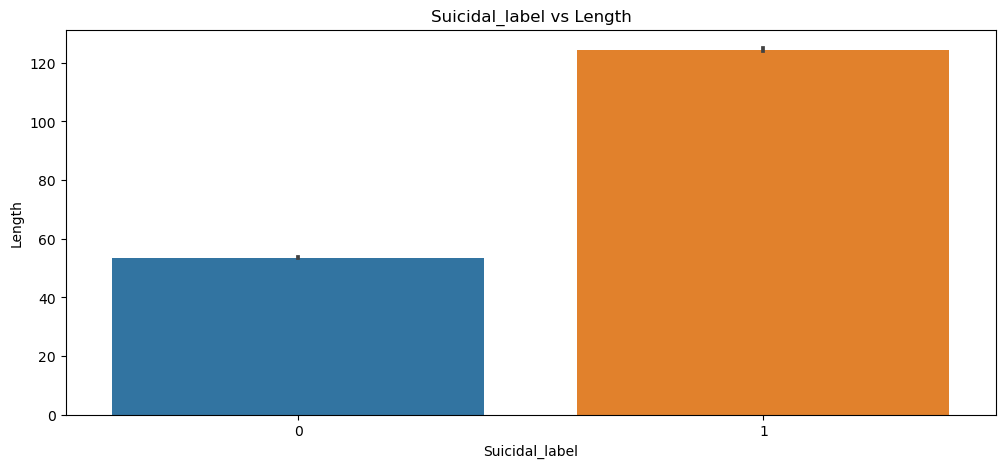

In [23]:
#EDA
plt.figure(figsize=(12,5))
sns.barplot(x='Suicidal_label',y='Length',data=Suicide)
plt.title('Suicidal_label vs Length')
plt.show()

In [24]:
#Since there are a still quite a lot of words we will check only the words with the highest correlation with the target variable.
from scipy.stats import pearsonr
Correlations = dict()
var = list(Suicide.columns)
var.remove('Suicidal_label')
for i in var:
    Correlations[i] = pearsonr(Suicide[i],Suicide['Suicidal_label'])[0]
Correlations = pd.DataFrame({'Feature':list(Correlations.keys()),'Correlation':list(Correlations.values())})
Correlations.sort_values('Correlation',ascending=False,inplace=True)
Correlations.set_index('Feature')
Correlations

,Feature,Correlation
1,Length,0.461558
45,SUICIDE,0.307711
34,KILL,0.307260
20,ANYMORE,0.304422
25,DIE,0.300119
...,...,...
375,CRUSH,-0.087836
338,BORED,-0.091183
128,GUYS,-0.100508
202,U,-0.104542


In [25]:
mean_correlation = Correlations['Correlation'].mean()
mean_correlation

0.08686905186286233

In [26]:
correlation_values = Correlations['Correlation'].values
correlation_median = np.median(correlation_values)
correlation_median

0.08546338908344787

In [27]:
correlation_cutoff = 0.1
Correlations = Correlations[(Correlations['Correlation'] >= correlation_cutoff) | (Correlations['Correlation'] <= -correlation_cutoff)]
Correlations

,Feature,Correlation
1,Length,0.461558
45,SUICIDE,0.307711
34,KILL,0.307260
20,ANYMORE,0.304422
25,DIE,0.300119
...,...,...
173,SORRY,0.100726
64,YEAR,0.100308
128,GUYS,-0.100508
202,U,-0.104542


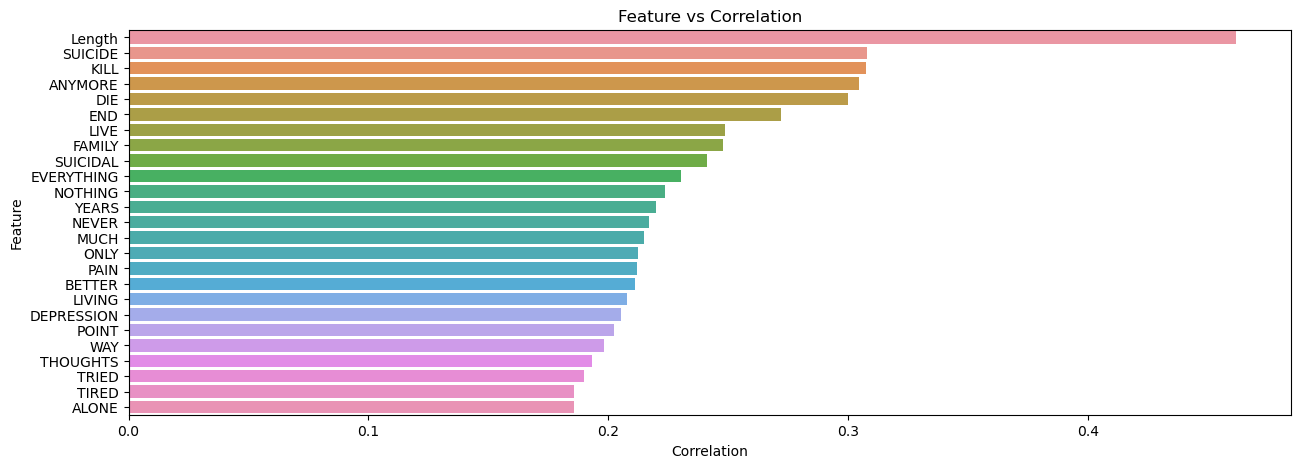

In [28]:
temp = Correlations.head(25)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()

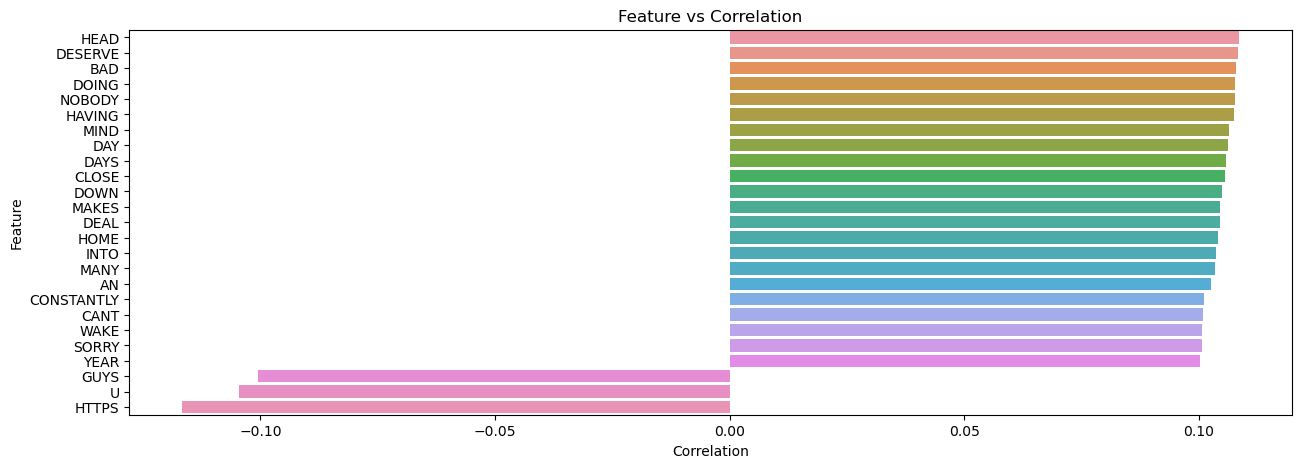

In [29]:
temp = Correlations.tail(25)
plt.figure(figsize=(15,5))
sns.barplot(x=temp.Correlation,y=temp.Feature)
plt.title('Feature vs Correlation')
plt.show()